In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import shutil

In [3]:
!mkdir Train
!mkdir Test

!mkdir Train/Fake
!mkdir Train/Real

!mkdir Test/Fake
!mkdir Test/Real

In [4]:
# Repositioning the train data so that keras can read it.

PATH = "/home/karthikmsd/Code/dir/sign_data/train/"

for i in os.listdir(PATH):
    
    contol = i.split("_")
    
    try:
    
        if contol[1]=="forg":
            
            os.system("cp -r {} Train/Fake".format(PATH+i))
            
    except:
        
        os.system("cp -r {} Train/Real".format(PATH+i))

In [5]:
# Rearrange the test data in such a way that keras can read it.

PATH = "/home/karthikmsd/Code/dir/sign_data/test/"

for i in os.listdir(PATH):
    
    contol = i.split("_")
    
    try:
    
        if contol[1]=="forg":
            
            os.system("cp -r {} Test/Fake".format(PATH+i))
            
    except:
        
        os.system("cp -r {} Test/Real".format(PATH+i))

In [6]:
# locations
train_dir = os.path.join("/home/karthikmsd/Code/dir/Train") 

test_dir = os.path.join("/home/karthikmsd/Code/dir/Test")

In [7]:
train_datagen = ImageDataGenerator(

     # rescaling pixels between 0,1
      rescale=1./255,

     # Angle of random rotation of images in degrees (0-180)
      rotation_range=40,

     # horizontal and vertical scrolling ratios of images
      width_shift_range=0.2,

     # horizontal and vertical scrolling ratios of images
      height_shift_range=0.2,

      # sprain operation
      shear_range=0.2,
  
     # zoom operation
      zoom_range=0.2,

     # rotate image vertically
      horizontal_flip=True,

       # excess after processing
      # determines how the image points are filled
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(

        # target directory
        train_dir,

        # all images will be resized as (150x150)
        target_size=(200, 200),

        # batch or stack size
        batch_size=64,

         # binary tags required
        # because we are using binary_crossentropy
        class_mode='binary')

Found 1649 images belonging to 2 classes.


In [9]:
test_generator = test_datagen.flow_from_directory(
        test_dir,

        target_size=(200, 200),

        batch_size=32,

        class_mode='binary')

Found 500 images belonging to 2 classes.


Label :  1.0


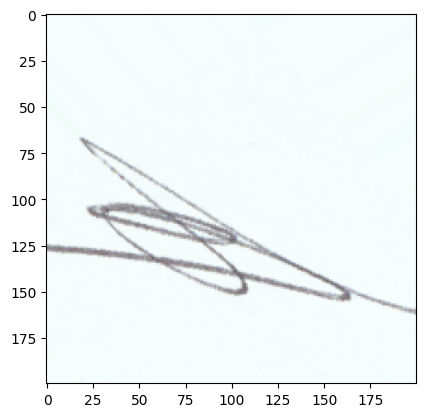

In [10]:
plt.imshow(train_generator[0][0][6])
print("Label : ",train_generator[0][1][5])

Label :  1.0


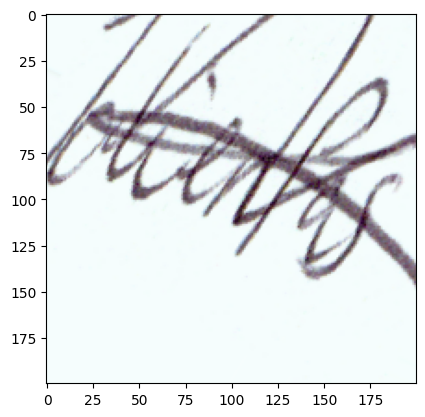

In [11]:
plt.imshow(train_generator[0][0][60])
print("Label : ",train_generator[0][1][60])

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200,3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

/home/karthikmsd/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 196, 196, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 194, 194, 16)   │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 602176)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   308,314,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 308,324,849 (1.15 GB)

 Trainable params: 308,324,849 (1.15 GB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
   # loss function
    loss="binary_crossentropy",
    
    # Optimization:
    # Considering the loss created by the data, which is the input of our network
    # self-update mechanism
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),

    # metrics to follow during training and testing. 
    metrics=["acc"])

In [18]:
history = model.fit(

    # training data
    train_generator,

    # the number of samples it will run through until the loop finishes (stack to get)
    steps_per_epoch=train_generator.samples//train_generator.batch_size,

    # number of cycles
    epochs=40,

    verbose=2)

Epoch 1/40


/home/karthikmsd/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 - 74s - 3s/step - acc: 0.5091 - loss: 1.6591
Epoch 2/40
25/25 - 3s - 101ms/step - acc: 0.5469 - loss: 0.4334
Epoch 3/40


2024-03-15 09:18:22.931162: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 - 58s - 2s/step - acc: 0.5079 - loss: 0.9624
Epoch 4/40
25/25 - 2s - 93ms/step - acc: 0.5156 - loss: 0.6781
Epoch 5/40


2024-03-15 09:19:23.044718: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 61s - 2s/step - acc: 0.4826 - loss: 0.9956
Epoch 6/40
25/25 - 2s - 97ms/step - acc: 0.5625 - loss: 0.3400
Epoch 7/40


2024-03-15 09:20:26.559557: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 59s - 2s/step - acc: 0.5117 - loss: 0.8021
Epoch 8/40
25/25 - 2s - 93ms/step - acc: 0.5312 - loss: 0.3439
Epoch 9/40


2024-03-15 09:21:27.446934: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 68s - 3s/step - acc: 0.5338 - loss: 0.7984
Epoch 10/40
25/25 - 2s - 96ms/step - acc: 0.6250 - loss: 0.3354
Epoch 11/40


2024-03-15 09:22:37.787596: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 58s - 2s/step - acc: 0.4915 - loss: 0.7814
Epoch 12/40
25/25 - 3s - 113ms/step - acc: 0.5781 - loss: 0.3327
Epoch 13/40


2024-03-15 09:23:38.632434: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 62s - 2s/step - acc: 0.5356 - loss: 0.7251
Epoch 14/40
25/25 - 2s - 94ms/step - acc: 0.6250 - loss: 0.3244
Epoch 15/40


2024-03-15 09:24:43.323477: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 59s - 2s/step - acc: 0.5464 - loss: 0.7031
Epoch 16/40
25/25 - 3s - 104ms/step - acc: 0.5312 - loss: 0.3641
Epoch 17/40


2024-03-15 09:25:44.566165: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 69s - 3s/step - acc: 0.5640 - loss: 0.6794
Epoch 18/40
25/25 - 2s - 91ms/step - acc: 0.5625 - loss: 0.3421
Epoch 19/40


2024-03-15 09:26:55.546936: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 63s - 3s/step - acc: 0.5943 - loss: 0.6709
Epoch 20/40
25/25 - 2s - 92ms/step - acc: 0.4375 - loss: 0.3534
Epoch 21/40


2024-03-15 09:28:01.239132: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 58s - 2s/step - acc: 0.6126 - loss: 0.6534
Epoch 22/40
25/25 - 2s - 98ms/step - acc: 0.5781 - loss: 0.3388
Epoch 23/40


2024-03-15 09:29:02.218961: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 61s - 2s/step - acc: 0.6069 - loss: 0.6534
Epoch 24/40
25/25 - 2s - 99ms/step - acc: 0.6562 - loss: 0.3245
Epoch 25/40


2024-03-15 09:30:05.679618: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 60s - 2s/step - acc: 0.6290 - loss: 0.6397
Epoch 26/40
25/25 - 3s - 112ms/step - acc: 0.6406 - loss: 0.3187
Epoch 27/40


2024-03-15 09:31:08.801219: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 63s - 3s/step - acc: 0.6726 - loss: 0.6211
Epoch 28/40
25/25 - 3s - 114ms/step - acc: 0.7031 - loss: 0.2957
Epoch 29/40


2024-03-15 09:32:14.864897: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 61s - 2s/step - acc: 0.6569 - loss: 0.6284
Epoch 30/40
25/25 - 2s - 90ms/step - acc: 0.6735 - loss: 0.2950
Epoch 31/40


2024-03-15 09:33:17.641375: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 63s - 3s/step - acc: 0.6738 - loss: 0.6132
Epoch 32/40
25/25 - 2s - 98ms/step - acc: 0.6094 - loss: 0.3127
Epoch 33/40


2024-03-15 09:34:22.739001: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 62s - 2s/step - acc: 0.6896 - loss: 0.5991
Epoch 34/40
25/25 - 2s - 100ms/step - acc: 0.7188 - loss: 0.2802
Epoch 35/40


2024-03-15 09:35:26.971277: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 64s - 3s/step - acc: 0.6719 - loss: 0.5989
Epoch 36/40
25/25 - 3s - 104ms/step - acc: 0.6406 - loss: 0.3017
Epoch 37/40


2024-03-15 09:36:33.188530: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 62s - 2s/step - acc: 0.6959 - loss: 0.5925
Epoch 38/40
25/25 - 3s - 104ms/step - acc: 0.6875 - loss: 0.2716
Epoch 39/40


2024-03-15 09:37:37.836998: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 62s - 2s/step - acc: 0.6965 - loss: 0.5824
Epoch 40/40
25/25 - 3s - 100ms/step - acc: 0.7656 - loss: 0.2923


2024-03-15 09:38:42.647531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


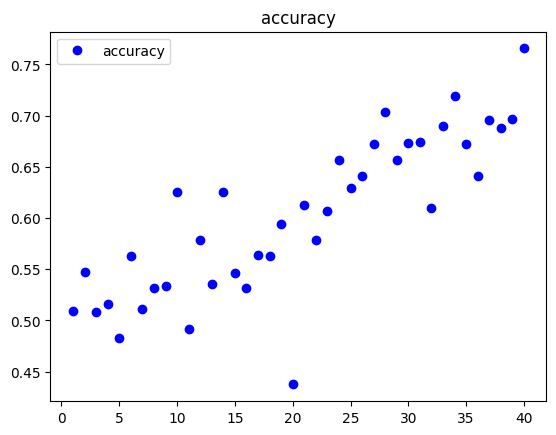

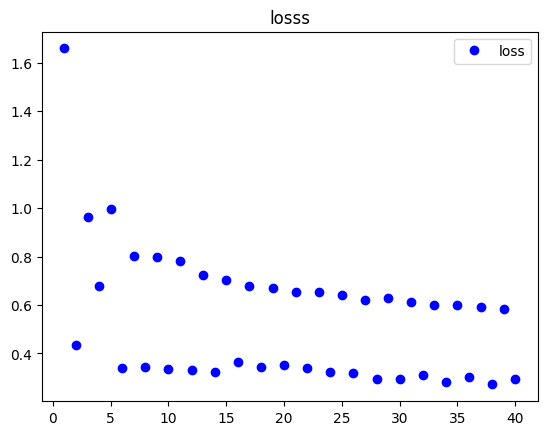

In [19]:
# accuracy score
acc = history.history["acc"]

# loss score
loss = history.history["loss"]

# We will plot graphs according to the number of epochs.
epochs = range(1, len(acc) + 1)

# We had training data drawn for itself..
plt.plot(epochs, acc, "bo", label="accuracy")

#the title of graph
plt.title("accuracy")

plt.legend()

plt.figure()

# we had training data drawn for itself.
plt.plot(epochs, loss, "bo", label="loss")


# the title of our graph
plt.title("losss")

plt.legend()

# display on screen
plt.show()

In [20]:
model.evaluate(test_generator)

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - acc: 0.7661 - loss: 0.5259


[0.5187757611274719, 0.7900000214576721]

In [21]:
model.save('last.h5')

In [22]:
# help(model.predict)

Help on method predict in module keras.src.backend.tensorflow.trainer:

predict(x, batch_size=None, verbose='auto', steps=None, callbacks=None) method of keras.src.models.sequential.Sequential instance
    Generates output predictions for the input samples.
    
    Computation is done in batches. This method is designed for batch
    processing of large numbers of inputs. It is not intended for use inside
    of loops that iterate over your data and process small numbers of inputs
    at a time.
    
    For small numbers of inputs that fit in one batch,
    directly use `__call__()` for faster execution, e.g.,
    `model(x)`, or `model(x, training=False)` if you have layers such as
    `BatchNormalization` that behave differently during
    inference.
    
    Note: See [this FAQ entry](
    https://keras.io/getting_started/faq/#whats-the-difference-between-model-methods-predict-and-call)
    for more details about the difference between `Model` methods
    `predict()` and `__call__(

In [23]:
import cv2

In [27]:
import os
import random

# Define the directory paths
fake_dir = "/home/karthikmsd/Code/dir/Test/Fake"
real_dir = "/home/karthikmsd/Code/dir/Test/Real"

# Function to get 10 random images from a directory
def get_random_images(directory):
    images = []
    # Get list of numbered directories
    numbered_dirs = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    # Shuffle the list of numbered directories
    random.shuffle(numbered_dirs)
    # Iterate through the shuffled list and select first 10 directories
    for num_dir in numbered_dirs[:10]:
        # Get list of files in the numbered directory
        files = os.listdir(os.path.join(directory, num_dir))
        # Filter out directories
        files = [f for f in files if os.path.isfile(os.path.join(directory, num_dir, f))]
        # Shuffle the list of files
        random.shuffle(files)
        # Append the file paths to the list of images
        images.extend([os.path.join(directory, num_dir, file) for file in files[:1]])  # Change to [:1] for one image per directory
    return images

# Get 10 random images from fake directory
fake_images = get_random_images(fake_dir)

# Get 10 random images from real directory
real_images = get_random_images(real_dir)

# Print the paths of the selected images
print("Random Fake Images:")
for image in fake_images:
    print(image)

print("\nRandom Real Images:")
for image in real_images:
    print(image)

Random Fake Images:
/home/karthikmsd/Code/dir/Test/Fake/064_forg/02_0105064.PNG
/home/karthikmsd/Code/dir/Test/Fake/069_forg/01_0106069.PNG
/home/karthikmsd/Code/dir/Test/Fake/065_forg/01_0118065.PNG
/home/karthikmsd/Code/dir/Test/Fake/060_forg/02_0121060.PNG
/home/karthikmsd/Code/dir/Test/Fake/059_forg/03_0104059.PNG
/home/karthikmsd/Code/dir/Test/Fake/053_forg/01_0207053.PNG
/home/karthikmsd/Code/dir/Test/Fake/068_forg/02_0113068.PNG
/home/karthikmsd/Code/dir/Test/Fake/057_forg/04_0208057.PNG
/home/karthikmsd/Code/dir/Test/Fake/067_forg/04_0212067.PNG
/home/karthikmsd/Code/dir/Test/Fake/066_forg/01_0127066.PNG

Random Real Images:
/home/karthikmsd/Code/dir/Test/Real/060/08_060.png
/home/karthikmsd/Code/dir/Test/Real/069/07_069.png
/home/karthikmsd/Code/dir/Test/Real/049/02_049.png
/home/karthikmsd/Code/dir/Test/Real/053/09_053.png
/home/karthikmsd/Code/dir/Test/Real/062/02_062.png
/home/karthikmsd/Code/dir/Test/Real/066/01_066.png
/home/karthikmsd/Code/dir/Test/Real/051/07_051.png
/h

In [52]:
len(test_generator)

16

In [64]:
model.load_weights("last.h5")

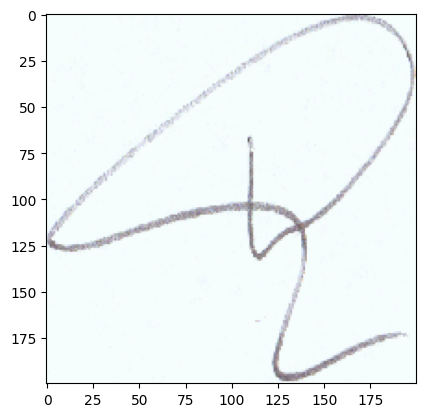

In [102]:
plt.imshow(test_generator[0][0][7])

In [137]:
batch1 = test_generator[0][0][:3]
batch2 = test_generator[0][0][3:6]

In [138]:
x = model.predict([batch1, batch2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


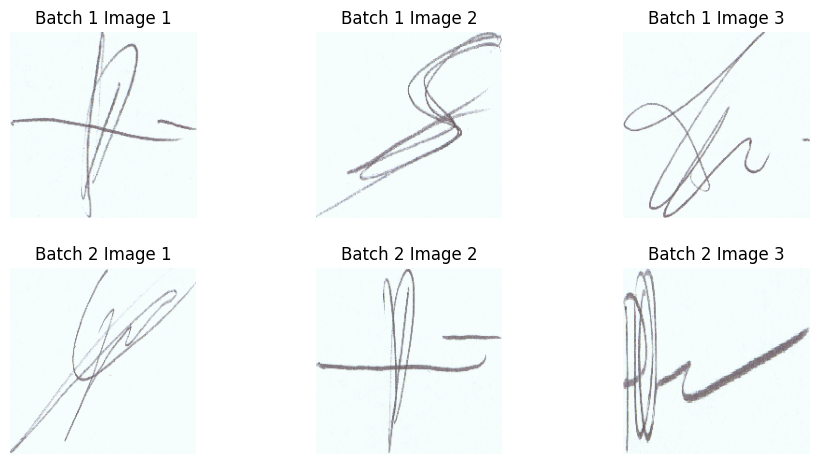

In [139]:
plt.figure(figsize=(10, 5))
for i in range(3):
    plt.subplot(2, 3, i + 1)
    plt.imshow(batch1[i])
    plt.title(f'Batch 1 Image {i + 1}')
    plt.axis('off')

# Create subplots for batch2 images
for i in range(3):
    plt.subplot(2, 3, i + 4)
    plt.imshow(batch2[i])
    plt.title(f'Batch 2 Image {i + 1}')
    plt.axis('off')

# Adjust layout and display the plot
plt.tight_layout(pad=2.0)
plt.show()

In [140]:
confidence = model.predict([batch1, batch2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


In [142]:
for conf in confidence:
    print(conf)

[0.67883545]
[0.6429781]
[0.6327672]
